## Kaulos RNN Tests
These tests require the keras master branch.

In [1]:
from kaulos import *
    
M = 2
T = 100
x_train = np.abs(np.random.randn(1,T,M)) * 0.1

component = LeakyIAF()
cell = KaulosWrapperCell([component])
x = keras.Input(x_train.shape[1:])
layer = RNN(cell, return_sequences = True)
y = layer(x)

model = Model(inputs=x, outputs=y)

optimizer = Adam()
model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
model.summary()

import time
start = time.time()
model_output = model.predict(x_train)
end = time.time()
print(end - start)

'''
import time
start = time.time()
model_output = model.train_on_batch(x_train, x_train)
end = time.time()
print(end - start)
'''

Using Theano backend.
Using cuDNN version 5105 on context None
Mapped name None to device cuda: GeForce GTX 1080 (0000:01:00.0)


Units: 2
State Size: 2
Unit Size per Layer: [2]
State Size per Layer: [2]
[0, 1]
[0, 1]
('V', 0)
('s', 1)
('I', 0)
V: Elemwise{sub,no_inplace}.0
('V', 0, Subtensor{::, int64:int64:}.0)
('s', 1, Subtensor{::, int64:int64:}.0)
Input Tensor: <TensorType(float32, matrix)>
Input State Tensor: (<TensorType(float32, matrix)>,)
Output Tensor: IncSubtensor{Set;::, int64:int64:}.0
Output State Tensor: [IncSubtensor{Set;::, int64:int64:}.0, IncSubtensor{Set;::, int64:int64:}.0]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100L, 2L)          0         
_________________________________________________________________
rnn_1 (RNN)                  (None, 100L, 2)           0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
6.73300004005


'\nimport time\nstart = time.time()\nmodel_output = model.train_on_batch(x_train, x_train)\nend = time.time()\nprint(end - start)\n'

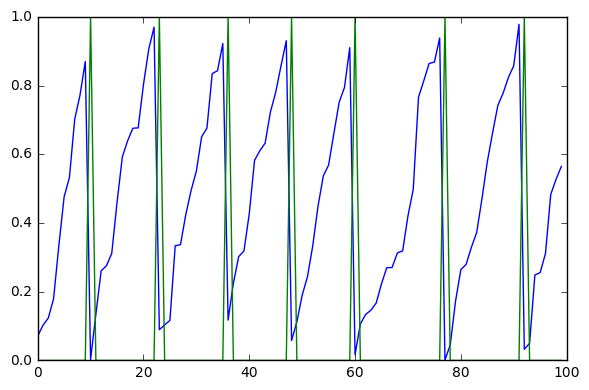

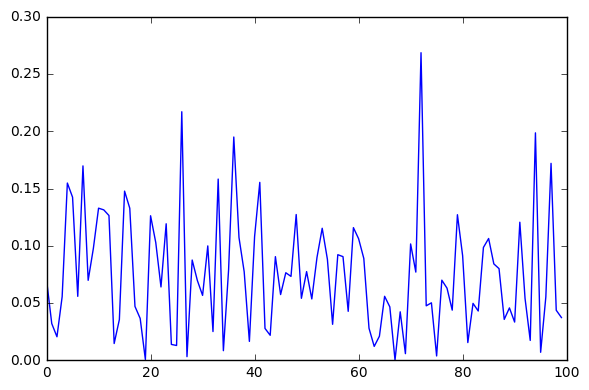

In [3]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(model_output[0])
plt.tight_layout()

plt.figure()
plt.plot(x_train[0,:,0])
plt.tight_layout()

In [1]:
from kaulos import *
    
M = 2
T = 100
x_train = np.abs(np.random.randn(1,T,M)) * 0.1

component_1 = LeakyIAF()
component_2 = LeakyIAF()
cell = KaulosWrapperCell([component_1, component_2])
x = keras.Input(x_train.shape[1:])
layer = RNN(cell, return_sequences = True)
y = layer(x)

model = Model(inputs=x, outputs=y)

optimizer = Adam()
model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
model.summary()

import time
start = time.time()
model_output = model.predict(x_train)
end = time.time()
print(end - start)

Using Theano backend.
Using cuDNN version 5105 on context None
Mapped name None to device cuda: GeForce GTX 1080 (0000:01:00.0)


Units: 4
State Size: [2, 2]
Unit Size per Layer: [2, 2]
State Size per Layer: [2, 2]


ValueError: setting an array element with a sequence.

## Component Level Tests
These tests require a rewrite.

In [1]:
from kaulos import *

M = 1
T = 100
x_train = np.abs(np.random.randn(1,T,M)) * 0.1

a = Input(shape=x_train.shape[2:])
b = LeakyIAF()(a)
model = Model(inputs=a, outputs=b[0])

optimizer = Adam()
model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
model.summary()

import time
start = time.time()
As = []
for i in range(x_train.shape[1]):
    model.train_on_batch(x_train[0,i,:], x_train[0,i,:])
    As.append(model.predict(x_train[0,i,:]))
end = time.time()
print(end - start)

Using Theano backend.
Using cuDNN version 5105 on context None
Mapped name None to device cuda: GeForce GTX 1080 (0000:01:00.0)


(None, 1L)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1L)                0         
_________________________________________________________________
leaky_iaf_1 (LeakyIAF)       [(None, 1L), (None, 1L)]  2         
Total params: 2
Trainable params: 0
Non-trainable params: 2
_________________________________________________________________
8.02900004387


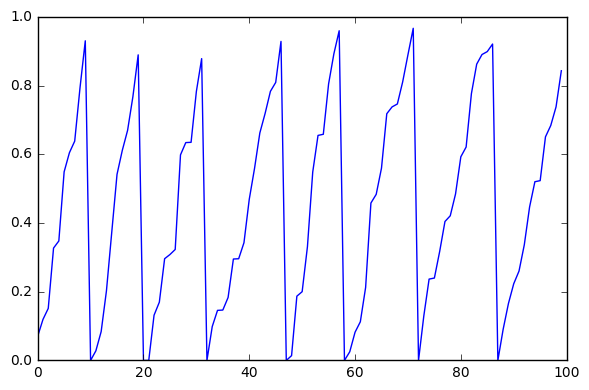

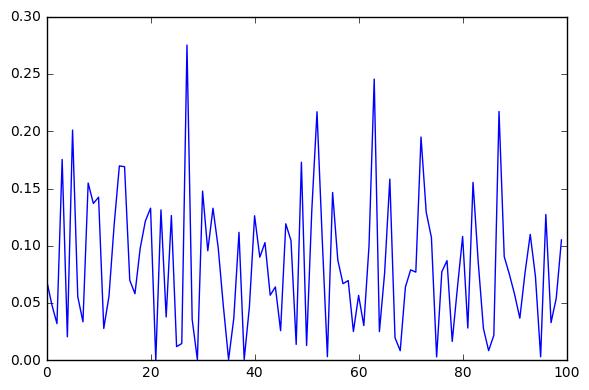

In [2]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.array(As)[:,0,0])
plt.tight_layout()

plt.figure()
plt.plot(x_train[0,:,0])
plt.tight_layout()

In [3]:
from kaulos import *

M = 1
T = 100000
x_train = np.abs(np.random.randn(1,T,M)) * 0. + 10.0

N = M
b = np.eye(N).reshape((N,N))

a = Input(shape=x_train.shape[2:])
b = HodgkinHuxley()(a)
model = Model(inputs=a, outputs=b[0])
optimizer = Adam()
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()


import time
start = time.time()
As = []
for i in range(x_train.shape[1]):
    model.train_on_batch(x_train[0,i,:], x_train[0,i,:])
    As.append(model.predict(x_train[0,i,:]))
end = time.time()
print(end - start)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 1L)                0         
_________________________________________________________________
hodgkin_huxley_1 (HodgkinHux [(None, 1L), (None, 1L)]  5         
Total params: 5
Trainable params: 0
Non-trainable params: 5
_________________________________________________________________
55.9760000706


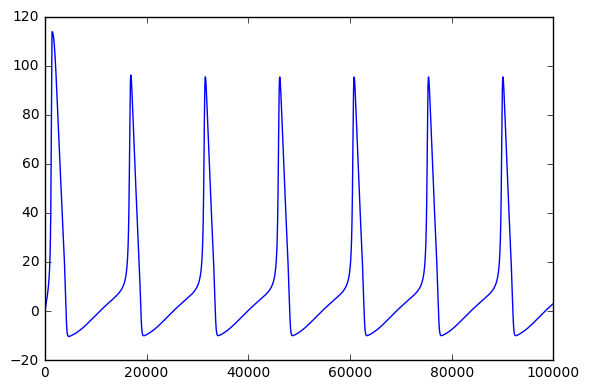

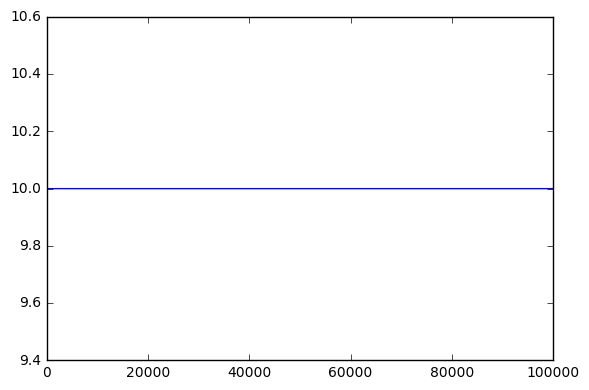

In [4]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.array(As)[:,0,0])
plt.tight_layout()

plt.figure()
plt.plot(x_train[0,:,0])
plt.tight_layout()

In [5]:
from kaulos import *

M = 1
T = 10000
x_train = np.greater(np.abs(np.random.randn(1,T,M)), 3.00) * 1.0

N = M
b = np.eye(N).reshape((N,N))

a = Input(shape=x_train.shape[2:])
b = AlphaSynapse()(a)
model = Model(inputs=a, outputs=b)

optimizer = Adam()
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()


import time
start = time.time()
As = []
for i in range(x_train.shape[1]):
    model.train_on_batch(x_train[0,i,:], x_train[0,i,:])
    As.append(model.predict(x_train[0,i,:]))
end = time.time()
print(end - start)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1L)                0         
_________________________________________________________________
alpha_synapse_1 (AlphaSynaps (None, 1L)                4         
Total params: 4
Trainable params: 0
Non-trainable params: 4
_________________________________________________________________
12.4709999561


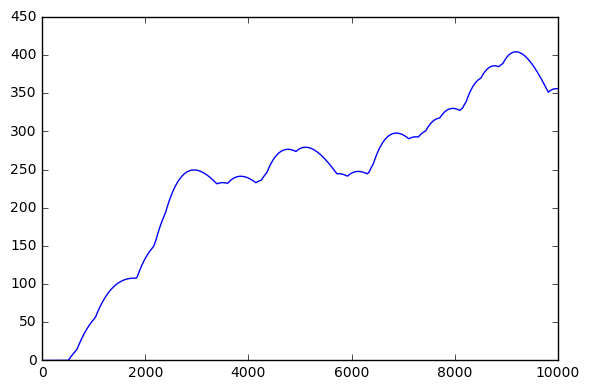

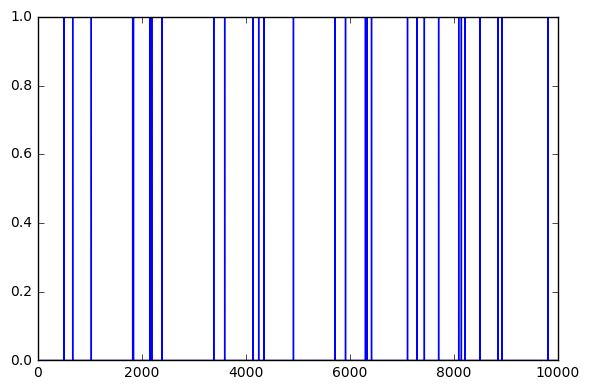

In [6]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.array(As)[:,0,0])
plt.tight_layout()

plt.figure()
plt.plot(x_train[0,:,0])
plt.tight_layout()

In [1]:
from kaulos import *

M = 100
T = 100
x_train = np.abs(np.random.randn(1,T,M)) * 0.1

a = Input(shape=(100,))
b = Lambda(lambda x: x[:,0:1], output_shape=(1L,))(a)
c = LeakyIAF()(b)
model = Model(inputs=a, outputs=c[0])

optimizer = Adam()
model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
model.summary()

import time
start = time.time()
As = []
for i in range(x_train.shape[1]):
    model.train_on_batch(x_train[0,i:i+1,:], x_train[0,i:i+1,0:1])
    As.append(model.predict(x_train[0,i:i+1,:]))
end = time.time()
print(end - start)

Using Theano backend.
Using cuDNN version 5105 on context None
Mapped name None to device cuda: GeForce GTX 1080 (0000:01:00.0)


(None, 1L)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 1L)                0         
_________________________________________________________________
leaky_iaf_1 (LeakyIAF)       [(None, 1L), (None, 1L)]  2         
Total params: 2
Trainable params: 0
Non-trainable params: 2
_________________________________________________________________
8.29799985886
